c:\Users\Rohith S D\Documents\Elevatelabs\venv\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


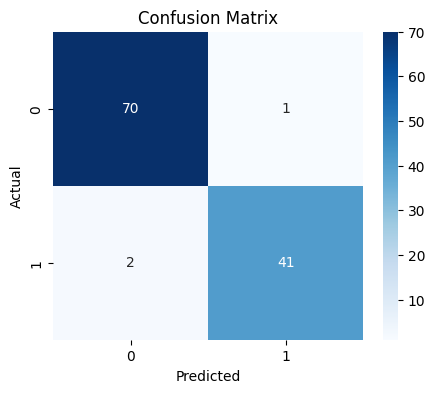

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC Score: 0.9974


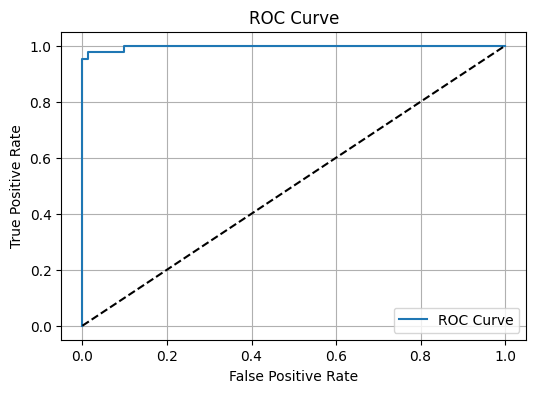


Confusion Matrix with Threshold = 0.4:
[[70  1]
 [ 1 42]]
Classification Report (Threshold Tuned):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



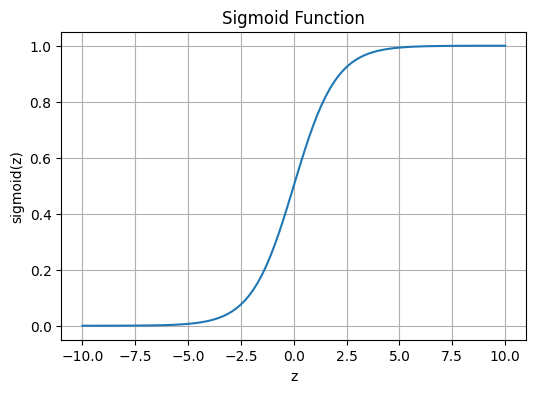

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Load dataset
df = pd.read_csv("data.csv")

# Drop 'id' column
df.drop('id', axis=1, inplace=True)

# Encode 'diagnosis' (M=1, B=0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_score = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_score:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Threshold tuning
threshold = 0.4
y_pred_threshold = (y_prob >= threshold).astype(int)
print(f"\nConfusion Matrix with Threshold = {threshold}:")
print(confusion_matrix(y_test, y_pred_threshold))
print("Classification Report (Threshold Tuned):")
print(classification_report(y_test, y_pred_threshold))

# Sigmoid plot
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z_vals = np.linspace(-10, 10, 100)
sigmoid_vals = sigmoid(z_vals)

plt.figure(figsize=(6, 4))
plt.plot(z_vals, sigmoid_vals)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid()
plt.show()
